# The Impact of a Song's Musical Characteristics on its Popularity

## The Dataset Report

27/05/2021

Written by Chris Vajdík (s1018903) for the course Frequentist Statistics. 

*Note: This project was initially developed in cooperation with Arne Wittgen, s1034858, and is being reworked this year by Chris Vajdík, s1018903, as discussed with Linda Geerligs on 6 April 2021. Therefore, you can find an additional section **VIII. Changes** which details all difference of the 2021 version versus the 2020 version.* 

## I. Abstract

This project aims to identify which musical characteristics of a song composed by a specific artist influence the song's popularity and which combination of characteristics should a new song composed by this artist possess in order to be as popular as possible among their listeners. Furthermore, this project lays the necessary programming groundwork for performing similar analyses.

## II. Introduction

\[todo\]

## III. The Data Set

\[todo\]

## IV. Methods

\[todo\]

### IV.I Prequisities

These prequisities bear no significance to the methods used to obtain the data set but will be used in the later subsections of this section.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import scipy.stats as stats
import pylab

sns.set_style("whitegrid")

The following function is used to make a distplot.

In [38]:
def make_distplot(data, xlim_min = 0, xlim_max = 1, xlabel="x", ylabel="y", title="A distplot"):
    plt.figure()
    sns.distplot(data)
    plt.xlim(xlim_min, xlim_max)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

The following function is used to make a scatterplot.

In [39]:
def make_scatterplot(x_data, y_data, xlabel="x", ylabel="y", title="A scatterplot"):
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

The following function is used to make a boxplot.

In [40]:
def make_boxplot(data, title="A boxplot"):
    plt.figure()
    plt.boxplot(data)
    plt.title(title)
    plt.show() 

The following function is used to make a Q-Q plot.

In [42]:
def make_qqplot(data, title="A Q-Q plot"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title)
    plt.show()

### IV.II Obtaining the data set

\[todo: description of Spotipy and the modules in `src`\]

In [52]:
data = pd.read_csv("D:/School/frequentist-statistics/ITM-song-popularity/database/itm_songs_preprocessed.csv")
data = data.drop("Unnamed: 0", axis=1)
print("%d songs with following attributes %s loaded." % (len(data), str(list(data.columns.values))))

86 songs with following attributes ['name', 'name_len', 'track_number', 'duration', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence', 'tempo', 'explicit', 'complexity', 'popularity_abs', 'popularity_norm', 'age_days'] loaded.


### IV.III Checking the CLT assumptions

To apply the basic methods of frequentist statistics, the CLT (Central Limit Theorem) assumptions must hold. Those are:

**- Independence:** the independence of a sample is typically assured by random division into the control and treatment groups, if those are used in the experiment, and by either sampling with replacement from the population or sampling without replacement but sampling less than 10% of the population. The reasoning for this is that for every additional observation sampled without replacement, the probability of sampling it becomes $\frac{1}{n-1}$ where $n$ stands for the remaining size of the population that can be sampled before the previous observation was sampled. This means that every sample obtained without replacement is dependent, however if its size is smaller than 10% of the population, this dependency is of negligible extend. Given the size of our entire population is $n=86$, to sample less than 10% of the population, it would be required to only sample 8 or less observations. This is too little to guarantee nearly-normal distributions of point estimates, therefore it was chosen to employ the notion of total population sampling - obtaining every observation of the population of interest. To ensure this sample is not dependent or biased, it is needed to establish a concrete definition of our population: studio-album songs composed by In This Moment. The 'studio-album' criterion excludes live recordings and single releases; this is to ensure no duplicate songs are present in the population. The 'song' criterion excludes interviews or podcasts; this ensures it is logical to analyse the musical characteristics. It is also required to ensure the population is indeed complete, which was assured by comparing the samples with the statistics at [last.fm page for In This Moment](https://www.last.fm/music/In+This+Moment) (last.fm is a musical statistics company).  

**- The success-failure condition:** it is required that the sample size is *sufficiently* large. This typically means there are at least 30 observations in the sample, which holds for the sample used in this report. If the population is binomial, there need to be at least 10 observations of 'successes' and at least 10 observations of 'failures'. The population in this report is not binomial, so this condition is irrelevant. 

Furthermore, we can visually inspect the distribution of the response variable to ensure the population is indeed of a nearly-normal distribution.

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


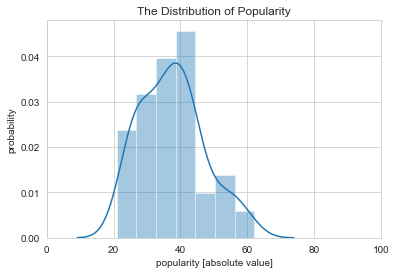

In [44]:
make_distplot(data["popularity_abs"], xlim_min = 0, xlim_max = 100, xlabel="popularity [absolute value]", ylabel="probability", title="The Distribution of Popularity")

It can be seen from the plot that the popularity distribution is unimodal, roughly symmetrical with a notable right skew. This is to be expected, as typically, there is a handful of songs from an artist that are significantly more popular than others; for example because they were released as singles, they are often played life, they have a video clip released or simply because listeners like them. The distribution has a bell shape, although it is quite narrow and rather bumpy, as a result of the right tail. Note that the x axis was set from 0 to 100 to accuratelly visually represent the standard deviation of the distribution in the relationship with the possible value range.

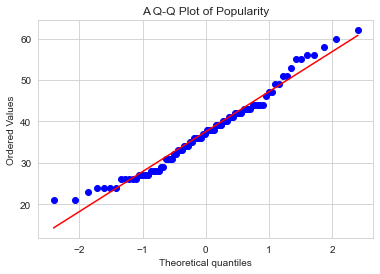

In [48]:
make_qqplot(data["popularity_abs"], title="A Q-Q Plot of Popularity")

The Q-Q plot further supports the claim that the popularity distribution is nearly normal. It however drives our attention to the lower values of the distribution which are more frequent than it would be in the normal distribution. There is no reason to suspect this occurred un-naturally, as it is common that there are several less well-known songs which are by extension less popular. Those are typically at the end of albums, not often played live or available only on certain markets (commonly the Japanese market has an exclusive song for every album as an incentive to get more sales since the market is generally expensive compared to the rest of the world).

The boxplot of popularity was examined as well but did not provide any additional insides.

### IV.IV Examining the data set

It is advised to examine the properties of explanatory variables before any analyses are performed. This is to ensure that we do not have unreasonable assumptions and we have a good idea about the properties of our data set, including outliers. 

Typically, the missing data is handled before this step, however this data set does not contain any missing data, as evidenced below.

In [25]:
print("The number of missing values per variable:")
data.isnull().sum()

The number of missing values per variable:


Unnamed: 0          0
name                0
name_len            0
track_number        0
duration            0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
complexity          0
popularity_abs      0
popularity_norm     0
age_days            0
dtype: int64

**Outlier Detection**

The first step of the visual inspection is using boxplots to analyse outliers in numerical explanatory variables. Following six boxplots showed some interesting properties while the rest of variables had generic boxplots (as can be seen in the Appendix IX.I).

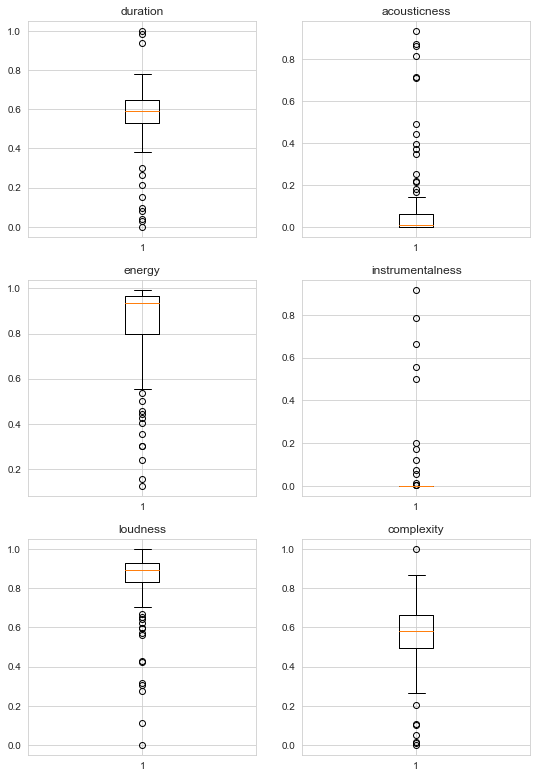

In [81]:
import math

variables_of_interest = ["duration", "acousticness", "energy", "instrumentalness", "loudness", "complexity"]
fig, axs = plt.subplots(3, 2, figsize=(9, 13.5))

for i, var in enumerate(variables_of_interest):
    axs[math.floor(i/2), i % 2].boxplot(data[var])
    axs[math.floor(i/2), i % 2].set_title(var)
    
plt.show()

\[todo: description of the six boxplots\]

## V. Results

\[todo\]

## VI. Limitations

\[todo\]

## VII. Conclusions

\[todo\]

## VIII. Changes

\[todo\]

## IX. Appendices

The appendices contain figures and statistics that were not necessarilly important but should be included for the completion's sake.

### IX.I Boxplots of numerical data

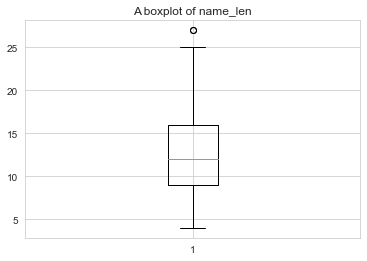

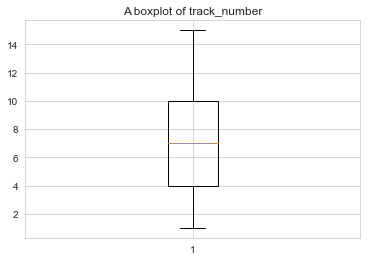

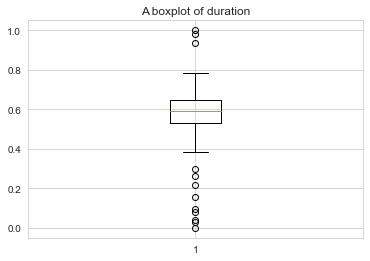

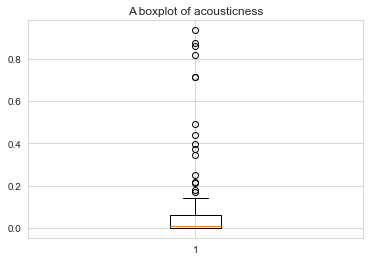

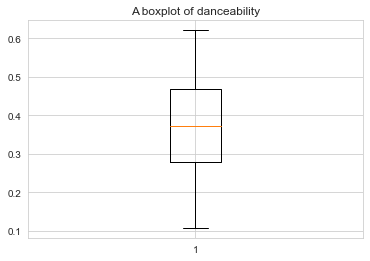

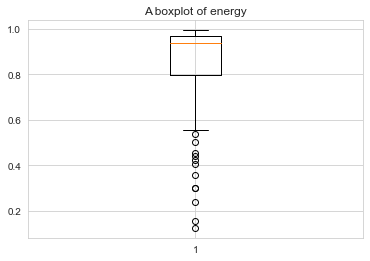

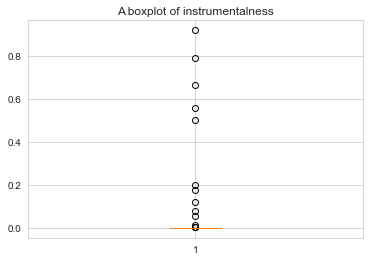

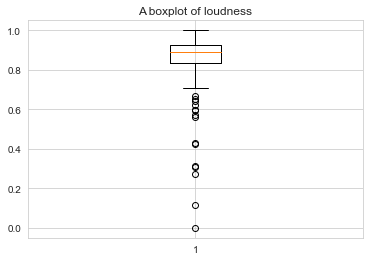

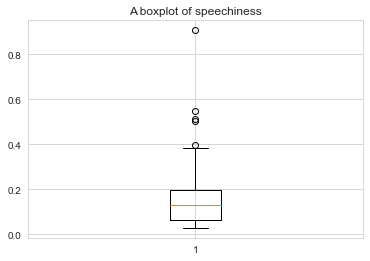

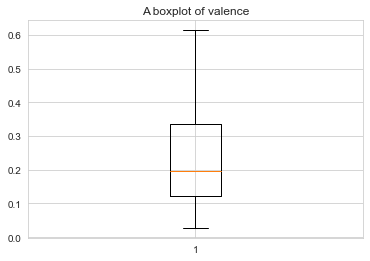

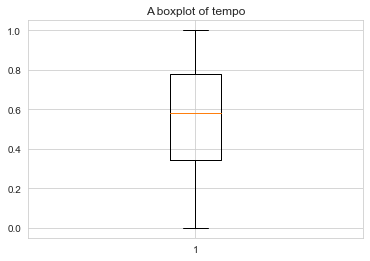

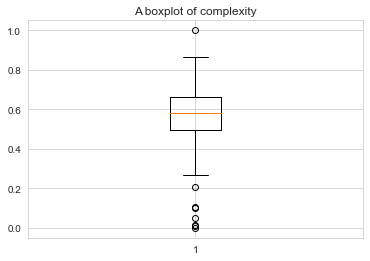

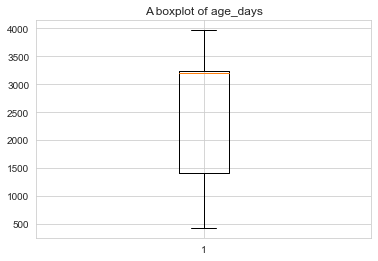

In [70]:
numerical_variables = ["name_len", "track_number", "duration", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "valence", "tempo", "complexity", "age_days"]
for variable in numerical_variables:
    make_boxplot(data[variable], title="A boxplot of %s" % variable)